<a href="https://colab.research.google.com/github/farhan-naqvi/deep-learning/blob/main/3rd_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('mobile_price_ranger_train.csv')

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
X = df.iloc[:,:-1].values.reshape(-1,20)
y = df.iloc[:,-1].values.reshape(-1,1)

In [14]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)
# y = sc.transform(y)

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()

In [16]:
# using train_test_split to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2,random_state = 0)

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model = Sequential() # created the model

# adding layers
model.add(Dense(16, activation='relu', input_dim = 20))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
160/160 [==============================] - 1s 734us/step - loss: 1.4607 - accuracy: 0.2883
Epoch 2/100
160/160 [==============================] - 0s 792us/step - loss: 1.2384 - accuracy: 0.4298
Epoch 3/100
160/160 [==============================] - 0s 859us/step - loss: 0.9713 - accuracy: 0.5976
Epoch 4/100
160/160 [==============================] - 0s 796us/step - loss: 0.7234 - accuracy: 0.7124
Epoch 5/100
160/160 [==============================] - 0s 808us/step - loss: 0.5547 - accuracy: 0.8061
Epoch 6/100
160/160 [==============================] - 0s 920us/step - loss: 0.4368 - accuracy: 0.8620
Epoch 7/100
160/160 [==============================] - 0s 782us/step - loss: 0.3546 - accuracy: 0.8793
Epoch 8/100
160/160 [==============================] - 0s 860us/step - loss: 0.2980 - accuracy: 0.9004
Epoch 9/100
160/160 [==============================] - 0s 884us/step - loss: 0.2574 - accuracy: 0.9203
Epoch 10/100
160/160 [==============================] - 0s 786us/step - l

KeyError: ignored

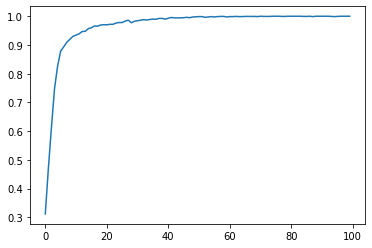

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()